# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














<center>
    <h1>SHOWZ</h1>
</center>

## INTRODUCCIÓN

El departamento de analítica de Showz, una empresa de venta de entradas a eventos, busca optimizar los gastos en marketing. Para tal efecto vamos a utilizar la información disponible: 

- Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- Un archivo con los pedidos en este periodo;
- Estadísticas de gastos de marketing.

El objetivo del análisis es investigar:

- Cómo los clientes usan el servicio;
- Cuándo empiezan a comprar;
- Cuánto dinero aporta cada cliente a la compañía;
- Cuándo los ingresos cubren el costo de adquisición de los clientes.


## INICIALIZACIÓN

Importo las librerías y cargo los archivos:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Verifico estructura inicial
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [2]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [3]:
 costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Se puede observar que los nombres de las columunas contienen mayúsculas y minúsculas, y además contienen espacios, siendo conveniente estandarizarlos conviertiéndolos a  minúsculas y usando snake_case.

Estandarizo los nombres de la columnas

In [4]:
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
costs.columns = costs.columns.str.lower().str.replace(" ", "_")

Elimino duplicados en nombres de columnas

In [5]:
visits = visits.loc[:, ~visits.columns.duplicated()]
orders = orders.loc[:, ~orders.columns.duplicated()]
costs = costs.loc[:, ~costs.columns.duplicated()]

Convierto columnas de fecha

In [6]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

Verifico la estructura modificada

In [7]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [9]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
 costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## ANÁLISIS Y MÉTRICAS PARA LAS VISITAS

### ¿Cuántas personas lo usan cada día, semana y mes?

In [13]:
# Creo nuevas columnas de fecha agrupadas
visits['date'] = visits['end_ts'].dt.date
visits['week'] = visits['end_ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits['month'] = visits['end_ts'].dt.to_period('M').dt.to_timestamp()

# Métricas de usuarios únicos
users_per_day = visits.groupby('date')['uid'].nunique().reset_index(name='unique_users')
users_per_week = visits.groupby('week')['uid'].nunique().reset_index(name='unique_users')
users_per_month = visits.groupby('month')['uid'].nunique().reset_index(name='unique_users')

# Mostrar las primeras filas de cada resultado
print("Usuarios únicos por día:\n", users_per_day.head())
print("\nUsuarios únicos por semana:\n", users_per_week.head())
print("\nUsuarios únicos por mes:\n", users_per_month.head())


Usuarios únicos por día:
          date  unique_users
0  2017-06-01           600
1  2017-06-02           610
2  2017-06-03           444
3  2017-06-04           472
4  2017-06-05           820

Usuarios únicos por semana:
         week  unique_users
0 2017-05-29          2015
1 2017-06-05          4133
2 2017-06-12          2812
3 2017-06-19          2877
4 2017-06-26          3066

Usuarios únicos por mes:
        month  unique_users
0 2017-06-01         13255
1 2017-07-01         14183
2 2017-08-01         11631
3 2017-09-01         18968
4 2017-10-01         29692


**ANÁLISIS**

Usuarios únicos por día (ejemplo)

Entre 440 y 820 personas usan el sitio cada día al inicio del periodo.

Usuarios únicos por semana (ejemplo)

Alrededor de 2,000 a 4,100 usuarios únicos por semana en las primeras semanas.

Usuarios únicos por mes (ejemplo)

En junio de 2017: 13,255 usuarios únicos

En octubre de 2017: 29,692 usuarios únicos, se nota un crecimiento importante.

**Ahora veamos el comportamiento mensual de forma gráfica:**

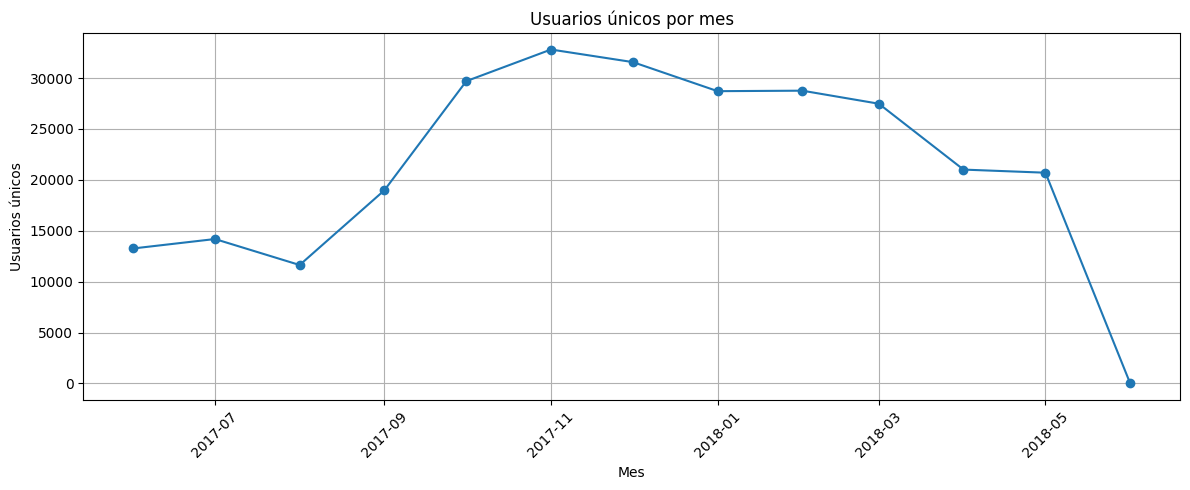

In [14]:

# Usuarios por mes
plt.figure(figsize=(12, 5))
plt.plot(users_per_month['month'], users_per_month['unique_users'], marker='o')
plt.title('Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Análisis de usuarios únicos por mes:**

Hay un crecimiento fuerte desde septiembre hasta noviembre de 2017, con un pico máximo en noviembre (~33,000 usuarios únicos).

A partir de diciembre de 2017, empieza una tendencia descendente que se acentúa en mayo de 2018 (posiblemente porque los datos están incompletos ese mes).

El último punto cae a 0 usuarios, probablemente porque no hay datos o el mes está incompleto.

### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [15]:
# Extraigo la fecha de la columna end_ts
visits['date'] = visits['end_ts'].dt.date

# Cuento el número de sesiones por día
sessions_per_day = visits.groupby('date').size().reset_index(name='sessions')

# Muestro los primeros resultados
print(sessions_per_day.head())


         date  sessions
0  2017-06-01       659
1  2017-06-02       660
2  2017-06-03       477
3  2017-06-04       505
4  2017-06-05       893


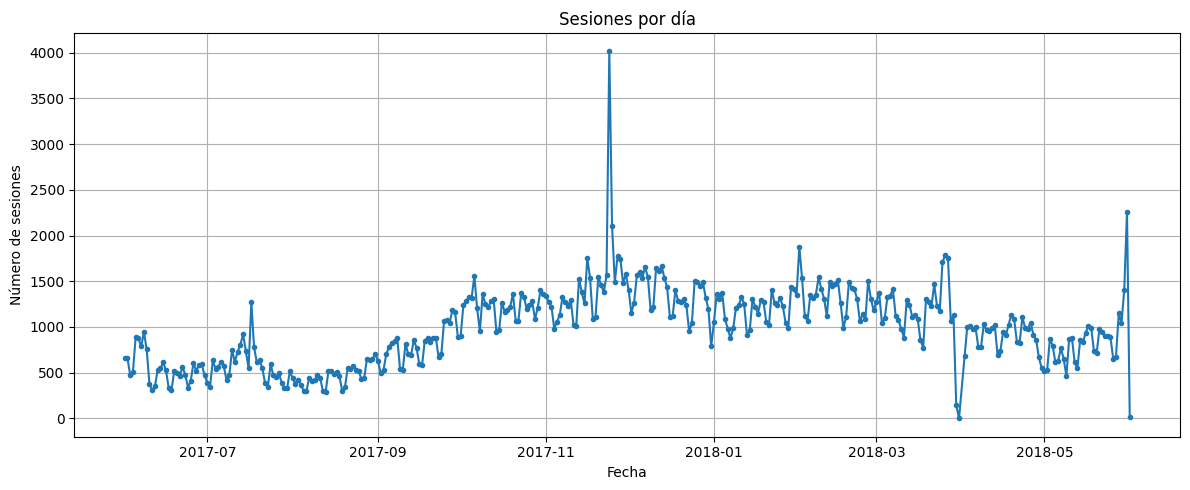

In [16]:

plt.figure(figsize=(12, 5))
plt.plot(sessions_per_day['date'], sessions_per_day['sessions'], marker='.')
plt.title('Sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Número de sesiones')
plt.grid(True)
plt.tight_layout()
plt.show()


**ANÁLISIS:**

- Desde mediados de 2017 hasta finales de ese año, hay una clara **tendencia al alza** en el número de sesiones.
- A partir de **enero de 2018**, la tendencia parece **descender** o estabilizarse, con más variabilidad.

- Hay varios **picos anómalos** de sesiones, destacando uno muy alto a finales de 2017 (alrededor de 4,000 sesiones). Esto podría deberse a Eventos importantes o lanzamientos de entradas populares, Campañas de marketing agresivas o cobertura en medios o colaboraciones con influencers.

- Hay días con valores cercanos a cero, que podrían indicar problemas técnicos en el sitio, días festivos o feriados con poca actividad o registros faltantes.



**Para ver mejor las tendencias a largo plazo sin tanto ruido diario, agrupo las sesiones por mes:**

       month  sessions
0 2017-06-01     16505
1 2017-07-01     17828
2 2017-08-01     14355
3 2017-09-01     23907
4 2017-10-01     37903


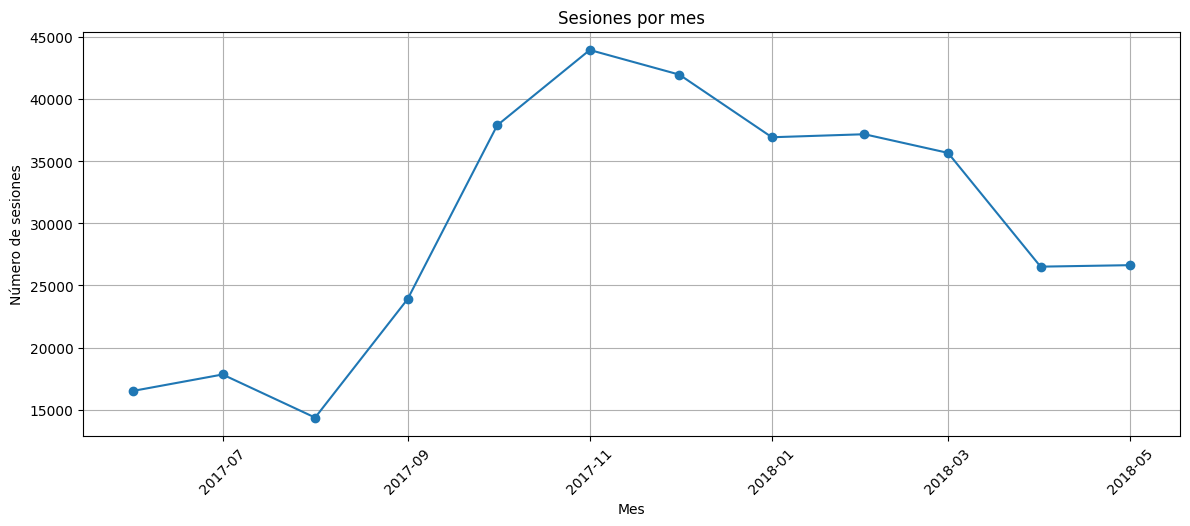

In [17]:
# Creo una columna con la fecha truncada al primer día del mes
visits['month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()

# Calculo el número de sesiones por mes
sessions_per_month = visits.groupby('month').size().reset_index(name='sessions')

# Muestro las primeras filas
print(sessions_per_month.head())

# Grafico
plt.figure(figsize=(12, 5))
plt.plot(sessions_per_month['month'], sessions_per_month['sessions'], marker='o')
plt.title('Sesiones por mes')
plt.xlabel('Mes')
plt.ylabel('Número de sesiones')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**ANÁLISIS:**

- Entre junio y noviembre 2017 las sesiones casi se triplican (de ~16,500 a ~44,000).
- Este aumento sostenido puede deberse a lanzamientos de campañas de marketing exitosas, mayor reconocimiento de la marca o del producto o a mejoras en la plataforma que incentivaron mayor uso recurrente.

- Después de noviembre 2017, se observa un descenso continuo en las sesiones mensuales. Esto podría deberse a reducción del presupuesto de marketing, saturación del mercado objetivo inicial, problemas técnicos o de experiencia de usuario, estacionalidad (ej. vacaciones, ciclos de consumo, etc.).

- Aunque hay una caída, las sesiones se estabilizan alrededor de 37,000 en los primeros meses de 2018. Esto podría indicar una base de usuarios leales o un uso más consistente pese a menor adquisición nueva.

- Se nota una bajada más fuerte en abril (\~26,500 sesiones). Sería importante investigar aspectos como si hubo un cambio en la estrategia, errores técnicos o corte en campañas, o si coincide con eventos externos (competencia, políticas, etc.)?



<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Atención</b> ⚠️ - Estás utilizando `.dt.date` para agrupar por día, lo cual está bien, pero podrías considerar mantener las columnas como tipo `datetime` para conservar la compatibilidad con funciones temporales avanzadas. Además, podrías agregar líneas de resumen estadístico al análisis (como máximos y mínimos de visitas/sesiones por periodo) para tener una perspectiva más cuantitativa.

</div>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Éxito</b> - El uso de visualizaciones para validar tendencias mensuales es muy acertado. El análisis narrativo que acompaña los gráficos está bien fundamentado y ayuda al lector a comprender mejor el comportamiento de los usuarios a lo largo del tiempo. La hipótesis sobre estacionalidad y campañas de marketing está bien planteada y enriquece la interpretación.

</div>



### ¿Cuál es la duración de cada sesión?

In [18]:
# Calculo la duración de la sesión
visits['duration'] = visits['end_ts'] - visits['start_ts']

# Convierto la duración a segundos para análisis numérico
visits['duration_seconds'] = visits['duration'].dt.total_seconds()

# Visualizo las primeras filas de ejemplo
visits[['start_ts', 'end_ts', 'duration', 'duration_seconds']].head()


,start_ts,end_ts,duration,duration_seconds
0,2017-12-20 17:20:00,2017-12-20 17:38:00,0 days 00:18:00,1080.0
1,2018-02-19 16:53:00,2018-02-19 17:21:00,0 days 00:28:00,1680.0
2,2017-07-01 01:54:00,2017-07-01 01:54:00,0 days 00:00:00,0.0
3,2018-05-20 10:59:00,2018-05-20 11:23:00,0 days 00:24:00,1440.0
4,2017-12-27 14:06:00,2017-12-27 14:06:00,0 days 00:00:00,0.0


**Calculo la duración promedio de la sesión**

In [19]:
print("Duración promedio de la sesión:", visits['duration_seconds'].mean(), "seg")


Duración promedio de la sesión: 643.0256872565387 seg


**Analizo la distribución de las duraciones:**

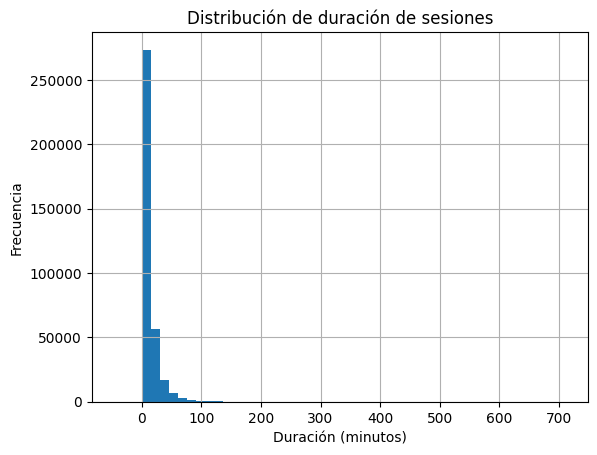

In [20]:
plt.hist(visits['duration_seconds'] / 60, bins=50)  # en minutos
plt.title('Distribución de duración de sesiones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



**ANÁLISIS**

La duración promedio de la sesión es de 643 segundos, es decir, aproximadamente 10.7 minutos. Esto indica que, en promedio, los usuarios pasan un poco más de 10 minutos en la plataforma por sesión, lo cual puede considerarse un buen nivel de interacción dependiendo del tipo de sitio o aplicación.

La mayoría de las sesiones duran menos de 60 minutos, y la gran concentración está por debajo de los 20 minutos.

La distribución tiene una larga cola a la derecha, es decir, hay algunas sesiones excepcionalmente largas.

El histograma muestra que hay outliers (sesiones que duran muchas horas), lo cual puede deberse a sesiones que quedaron abiertas sin actividad, errores en el sistema de tracking o a usuarios que dejaron el sitio abierto en segundo plano.

**Para una mejor visualización, elimino los outliers usando el rango intercuartílico (IQR) y filtro los valores fuera de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].**

In [21]:
# Convierto a minutos para interpretar mejor
duraciones = visits['duration_seconds'] / 60  

# Calculo del IQR
Q1 = duraciones.quantile(0.25)
Q3 = duraciones.quantile(0.75)
IQR = Q3 - Q1

# Defino los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro sin outliers
visits_sin_outliers = visits[(duraciones >= limite_inferior) & (duraciones <= limite_superior)]


Verifico el efecto de esta acción

In [22]:
print("Original:", visits.shape[0])
print("Sin outliers:", visits_sin_outliers.shape[0])



Original: 359400
Sin outliers: 333185


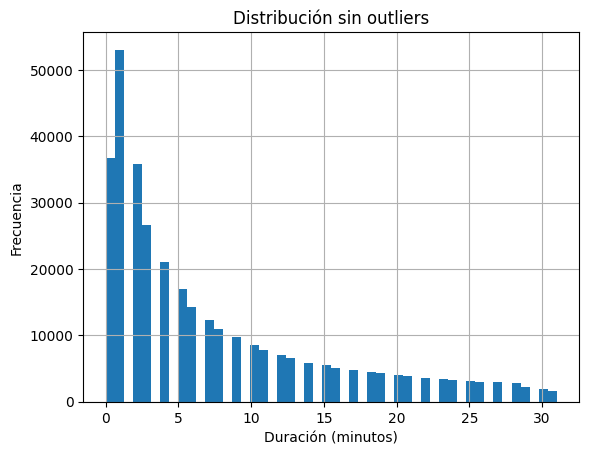

In [23]:
plt.hist(visits_sin_outliers['duration_seconds'] / 60, bins=50)
plt.title('Distribución sin outliers')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**ANÁLISIS**

En esta gráfica de distribución de duración de sesiones **sin outliers** podemos extraer varias observaciones importantes:

**Distribución sesgada a la derecha**

* La mayoría de las sesiones tienen una duración **muy corta** (concentradas entre 0 y 5 minutos).
* La frecuencia disminuye progresivamente a medida que aumenta la duración.
* Esto indica una **distribución asimétrica positiva**, típica en datos de comportamiento de usuarios web.

**Moda clara y pico inicial**

* El pico más alto ocurre cerca del primer bin (entre 0 y 1 minuto), lo que muestra que **una gran parte de los usuarios abandona rápidamente el sitio**.
* Puede sugerir problemas de experiencia de usuario, contenido poco relevante, o tráfico no calificado.

**Cola larga pero sin outliers extremos**

* Aunque la cola derecha sigue presente, al eliminar los outliers ya no hay valores extremadamente grandes.
* Esto permite un análisis más realista y representativo del comportamiento general.

**Duración promedio realista**

* Como se eliminaron los valores atípicos, cualquier estadístico como la **media o mediana** ahora será más robusto y representativo.

**Conclusiones**

* La mayoría de los usuarios **no permanecen mucho tiempo** en el sitio.
* Puede haber oportunidad de mejorar la **retención** o la **calidad del tráfico**.
  
* Sin embargo, es necesario tener en cuenta que se trata de "Showz", una empresa de venta de entradas de eventos, por lo cual muchos usuarios podrían entrar sabiendo exactamente qué evento quieren, realizar la compra en pocos minutos y salir. Esto podría ser normal en sitios de venta de entradas, especialmente si la experiencia de usuario está optimizada y la información está clara desde el inicio.

Otros usuarios quizás solo están consultando fechas, precios o disponibilidad sin intención inmediata de comprar. Eso también genera sesiones cortas, pero no necesariamente negativas: son parte del proceso de decisión del usuario.



### ¿Con qué frecuencia los usuarios regresan?

**Para este efecto, defino cohortes por primera visita mensual:**

In [24]:
# Convierto la fecha de inicio a período mensual
cohorts = visits.groupby('uid')['start_ts'].min().dt.to_period('M').astype(str).reset_index()
cohorts.rename(columns={'start_ts': 'first_month'}, inplace=True)

# Reviso contenido de cohorts
print(cohorts.head()) 

# Hago el merge asegurando que `first_month` es compatible con `start_ts`
visits = visits.merge(cohorts, on='uid', how='left')

# Convertir `first_month` nuevamente a datetime para cálculos
visits['first_month'] = pd.to_datetime(visits['first_month'])
visits['months_since_first_visit'] = (visits['start_ts'].dt.to_period('M') - visits['first_month'].dt.to_period('M')).apply(lambda x: x.n)

               uid first_month
0   11863502262781     2018-03
1   49537067089222     2018-02
2  297729379853735     2017-06
3  313578113262317     2017-09
4  325320750514679     2017-09


**Ahora calculo el número de meses desde la primera visita de cada usuario:**

In [25]:
# Convierto `first_month` a formato datetime para cálculos
visits['first_month'] = pd.to_datetime(visits['first_month'])

# Calculo la cantidad de meses desde la primera visita
visits['months_since_first_visit'] = (visits['start_ts'].dt.to_period('M') - visits['first_month'].dt.to_period('M')).apply(lambda x: x.n)

# Verifico los resultados
print(visits[['uid', 'first_month', 'start_ts', 'months_since_first_visit']].head())

                    uid first_month            start_ts  \
0  16879256277535980062  2017-12-01 2017-12-20 17:20:00   
1    104060357244891740  2018-02-01 2018-02-19 16:53:00   
2   7459035603376831527  2017-07-01 2017-07-01 01:54:00   
3  16174680259334210214  2018-03-01 2018-05-20 10:59:00   
4   9969694820036681168  2017-12-01 2017-12-27 14:06:00   

   months_since_first_visit  
0                         0  
1                         0  
2                         0  
3                         2  
4                         0  


**Calculo cuántos usuarios de cada cohorte regresan en los meses posteriores:**

In [26]:
# Agrupo por mes de ingreso y meses transcurridos
retention = visits.groupby(['first_month', 'months_since_first_visit'])['uid'].nunique().unstack()
retention.fillna(0, inplace=True)

# Calculo la tasa de retención dividiendo por el tamaño inicial de cada cohorte
cohort_sizes = retention.iloc[:, 0]
retention_rate = retention.div(cohort_sizes, axis=0) * 100

print(retention_rate.head())  # Visualizar la matriz de retención

months_since_first_visit     0         1         2         3         4   \
first_month                                                               
2017-06-01                100.0  7.866355  5.377479  6.139226  6.855721   
2017-07-01                100.0  5.608828  5.129376  5.616438  5.821918   
2017-08-01                100.0  7.690797  6.286219  6.276397  5.009331   
2017-09-01                100.0  8.548851  6.920498  5.070642  3.939176   
2017-10-01                100.0  7.860800  5.223852  3.895754  3.426108   

months_since_first_visit        5         6         7         8         9   \
first_month                                                                  
2017-06-01                7.142318  6.101516  5.777208  5.234181  5.083340   
2017-07-01                4.817352  4.535769  4.573820  3.881279  2.861492   
2017-08-01                4.400354  3.634221  3.948532  2.789510  2.602888   
2017-09-01                3.783525  3.585967  2.418582  2.280891  0.000000   
2017-1

**Para entender la evolución de la retención genero un mapa de calor:**

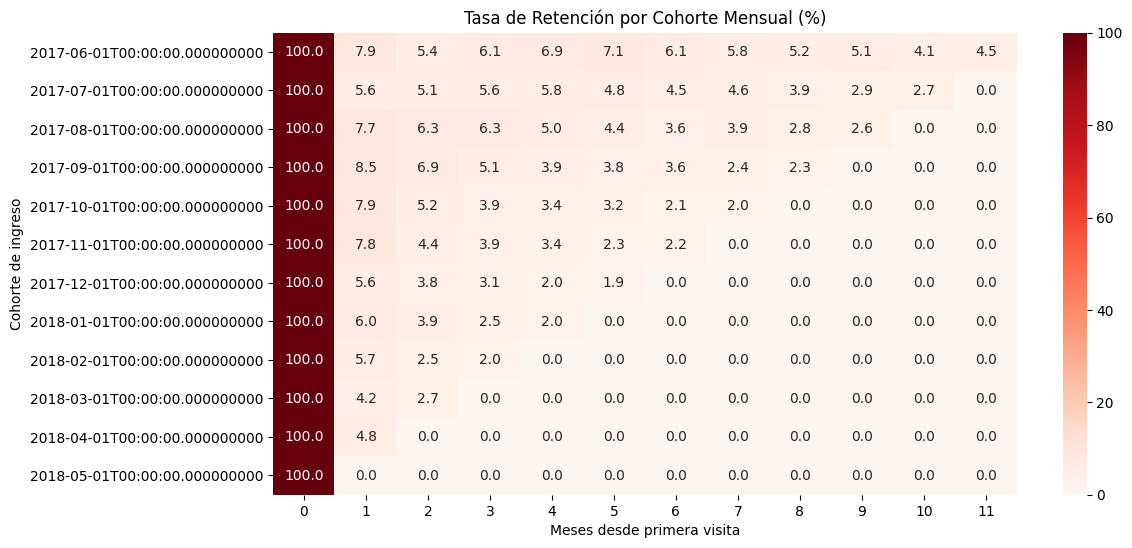

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_rate, cmap='Reds', annot=True, fmt=".1f")
plt.title("Tasa de Retención por Cohorte Mensual (%)")
plt.xlabel("Meses desde primera visita")
plt.ylabel("Cohorte de ingreso")
plt.show()

**ANÁLISIS**

- Como era de esperarse, **cada cohorte inicia con un 100% en el mes 0**, porque todos los usuarios hacen su primera interacción ese mes.  
- Luego, la retención **disminuye progresivamente** a medida que los meses avanzan, mostrando que muchos usuarios no regresan.  
- Las cohortes de **junio y julio de 2017** tienen una retención relativamente estable después de los primeros meses, con tasas que rondan el **5-7% después de 6 meses**.  
- Sin embargo, las cohortes más recientes, como **septiembre y octubre de 2017**, muestran una caída más pronunciada en los primeros meses, con retenciones de **menos del 4% después de 6 meses**. Esto podría indicar cambios en el tipo de usuarios adquiridos o en las estrategias de adquisición.  
- La cohorte de **junio de 2017** parece ser una de las más sólidas, con un descenso gradual pero con tasas superiores al **5% incluso después de 10 meses**.  
- Algunas cohortes posteriores tienen caídas más abruptas, lo que podría estar ligado a factores externos como cambios en la plataforma, estrategias de marketing o incluso eventos de temporada.  
- **Las cohortes más antiguas retienen mejor a los usuarios**, lo que sugiere que las estrategias de adquisición iniciales pudieron haber sido más efectivas para atraer usuarios comprometidos.  
- **Las cohortes más nuevas tienden a perder usuarios más rápido**, lo que podría significar que la calidad de la adquisición ha disminuido o que los usuarios recientes tienen menor afinidad con la plataforma.  


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Éxito</b> -  Has demostrado un excelente dominio del análisis de duración de sesiones y retención de usuarios. Calcular la duración en segundos, remover outliers con IQR y visualizar la distribución antes y después de limpiarlos es una práctica ejemplar. Además, el análisis de cohortes está bien estructurado: defines correctamente las cohortes, calculas el tiempo transcurrido y produces una matriz de retención clara con visualización en heatmap. Este enfoque refleja habilidades analíticas sólidas y un buen criterio para interpretar el comportamiento del usuario en plataformas digitales. 👏📊

</div> 



## ANÁLISIS Y MÉTRICAS PARA LAS VENTAS

### ¿Cuándo empieza la gente a comprar? 

**En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.**

**Calculo la primera visita y la primera compra por usuario**

In [28]:
# Primera visita por usuario
first_visits = visits.groupby("uid")["start_ts"].min().rename("first_visit")

# Primera compra por usuario
first_purchases = orders.groupby("uid")["buy_ts"].min().rename("first_purchase")

# Unir ambas
conversion = pd.concat([first_visits, first_purchases], axis=1).dropna()

conversion.head()



,first_visit,first_purchase
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


**Calculo los días hasta la conversión y la cohorte de cada usuario**

In [29]:
# Días hasta la conversión
conversion["days_to_conversion"] = (conversion["first_purchase"] - conversion["first_visit"]).dt.days

# Etiquetas de conversión
conversion["conversion_label"] = "Conversion " + conversion["days_to_conversion"].astype(str) + "d"

# Cohorte mensual: mes de la primera visita
conversion["cohort_month"] = conversion["first_visit"].dt.to_period("M")

conversion[["first_visit", "first_purchase", "days_to_conversion", "conversion_label", "cohort_month"]].head(10)



,first_visit,first_purchase,days_to_conversion,conversion_label,cohort_month
uid,,,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106,Conversion 106d,2017-09
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,Conversion 0d,2017-06
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,Conversion 0d,2017-10
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0,Conversion 0d,2018-01
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,Conversion 0d,2017-11
3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,0,Conversion 0d,2018-03
3605148382144603,2017-08-15 21:54:00,2017-09-21 20:56:00,36,Conversion 36d,2017-08
3753586865891862,2018-03-03 13:47:00,2018-03-03 13:50:00,0,Conversion 0d,2018-03
4808417689019433,2018-01-09 23:10:00,2018-01-09 23:32:00,0,Conversion 0d,2018-01


**Distribución de conversiones por cohorte y días**

In [30]:
# Conteo por cohorte y días a conversión
conversion_pivot = (
    conversion
    .groupby(["cohort_month", "conversion_label"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

conversion_pivot.head()


conversion_label,Conversion 0d,Conversion 100d,Conversion 101d,Conversion 102d,Conversion 103d,Conversion 104d,Conversion 105d,Conversion 106d,Conversion 107d,Conversion 108d,...,Conversion 91d,Conversion 92d,Conversion 93d,Conversion 94d,Conversion 95d,Conversion 96d,Conversion 97d,Conversion 98d,Conversion 99d,Conversion 9d
cohort_month,,,,,,,,,,,,,,,,,,,,,
2017-06,1804,2,6,2,3,3,2,3,3,5,...,6,3,4,1,4,4,4,4,2,6
2017-07,1526,2,1,3,1,0,2,2,3,5,...,6,3,6,1,3,0,5,2,2,5
2017-08,1097,4,3,3,1,0,4,0,2,0,...,5,2,2,3,2,4,2,4,1,4
2017-09,1966,3,1,0,2,2,3,2,2,3,...,1,3,1,2,3,4,4,3,3,14
2017-10,3302,5,4,5,1,1,2,3,4,2,...,7,3,2,6,5,4,3,5,5,15


**Distribución porcentual dentro de cada cohorte**

In [31]:
conversion_percent = conversion_pivot.div(conversion_pivot.sum(axis=1), axis=0).round(3) * 100

print(conversion_percent.head())  # Ver primeras filas
print(conversion_percent.describe())  # Ver distribución de valores
print(conversion_percent.sum(axis=1))  # La suma por fila debe ser ~100%


conversion_label  Conversion 0d  Conversion 100d  Conversion 101d  \
cohort_month                                                        
2017-06                    61.7              0.1              0.2   
2017-07                    62.1              0.1              0.0   
2017-08                    63.7              0.2              0.2   
2017-09                    64.3              0.1              0.0   
2017-10                    70.6              0.1              0.1   

conversion_label  Conversion 102d  Conversion 103d  Conversion 104d  \
cohort_month                                                          
2017-06                       0.1              0.1              0.1   
2017-07                       0.1              0.0              0.0   
2017-08                       0.2              0.1              0.0   
2017-09                       0.0              0.1              0.1   
2017-10                       0.1              0.0              0.0   

conversion_label  

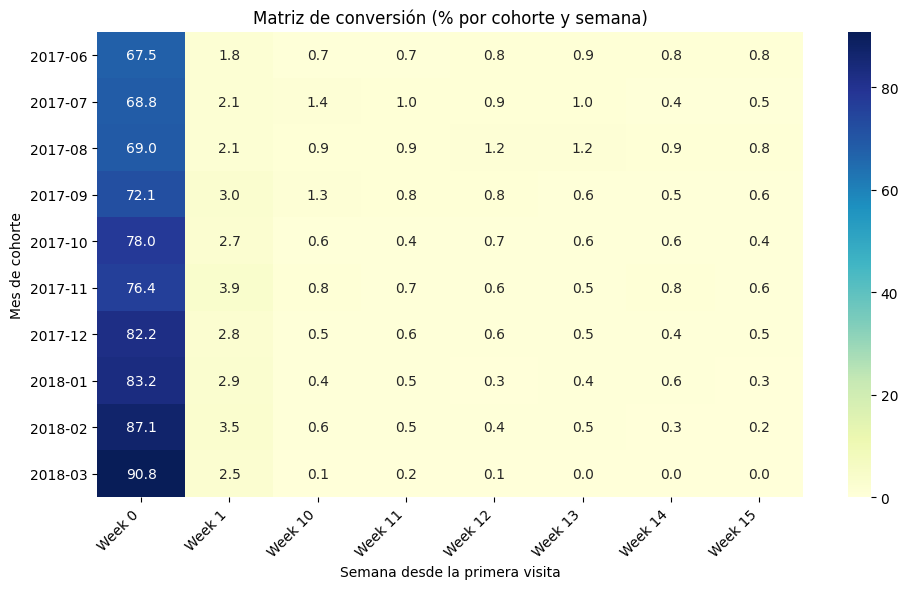

In [32]:
# Extraigo los días numéricos desde los nombres de columna tipo "Conversion 0d"
days = [int(col.split()[1][:-1]) for col in conversion_pivot.columns]  # "Conversion 0d" -> 0
    
# Creo un mapping de columnas a semanas
week_mapping = {col: f'Week {day // 7}' for col, day in zip(conversion_pivot.columns, days)}
    
# Renombro las columnas del pivot usando el mapping
conversion_weekly = conversion_pivot.rename(columns=week_mapping)
    
# Agrupo columnas por semana (suma de conversiones por semana)
conversion_weekly = conversion_weekly.groupby(conversion_weekly.columns, axis=1).sum()
    
# Calculo el porcentaje por cohorte
conversion_percent = conversion_weekly.div(conversion_weekly.sum(axis=1), axis=0).round(3) * 100
    
# Limito para visualización
subset = conversion_percent.iloc[:10, :8]  # Primeras 10 cohortes y 8 semanas
    
# Visualizo
plt.figure(figsize=(10, 6))
sns.heatmap(subset, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Matriz de conversión (% por cohorte y semana)")
plt.xlabel("Semana desde la primera visita")
plt.ylabel("Mes de cohorte")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**ANÁLISIS**

**Alto porcentaje de conversión en la primera semana**: La mayoría de los usuarios compran sus entradas **dentro de los primeros días tras el registro**, posiblemente motivados por promociones de bienvenida, urgencia de eventos próximos o estrategias de venta relámpago.  

**Disminución progresiva de compras después de la primera semana**: A medida que pasa el tiempo, la probabilidad de que un usuario compre una entrada se reduce significativamente, lo que sugiere que **las campañas deben estar orientadas a cerrar ventas rápidamente** después del registro.  

**Variaciones en la conversión entre cohortes**: Algunas cohortes muestran compras más rápidas que otras. Esto puede estar influenciado por **temporadas de alta demanda**, eventos con mayor atractivo o estrategias de publicidad específicas.  

**Compras tardías en algunas cohortes**: Aunque la mayoría de las conversiones ocurren en la primera semana, algunas cohortes continúan comprando entradas después de varias semanas o meses, lo que indica oportunidades para **retargeting y campañas de recordatorio** dirigidas a usuarios que aún no han tomado acción.  



### ¿Cuántos pedidos hacen durante un período de tiempo dado?

**Para responder a esta pregunta, vamos a darle un enfoque de análisis semanal**

**Agrego una columna de semana**

In [33]:
orders["week"] = orders["buy_ts"].dt.to_period("W")

**Cuento los pedidos por semana**

In [34]:
weekly_orders = orders.groupby("week").size()

print(weekly_orders.head())

week
2017-05-29/2017-06-04    340
2017-06-05/2017-06-11    938
2017-06-12/2017-06-18    343
2017-06-19/2017-06-25    371
2017-06-26/2017-07-02    460
Freq: W-SUN, dtype: int64


**Para analizar la tendencia de compras semanales, genero un gráfico de líneas:**

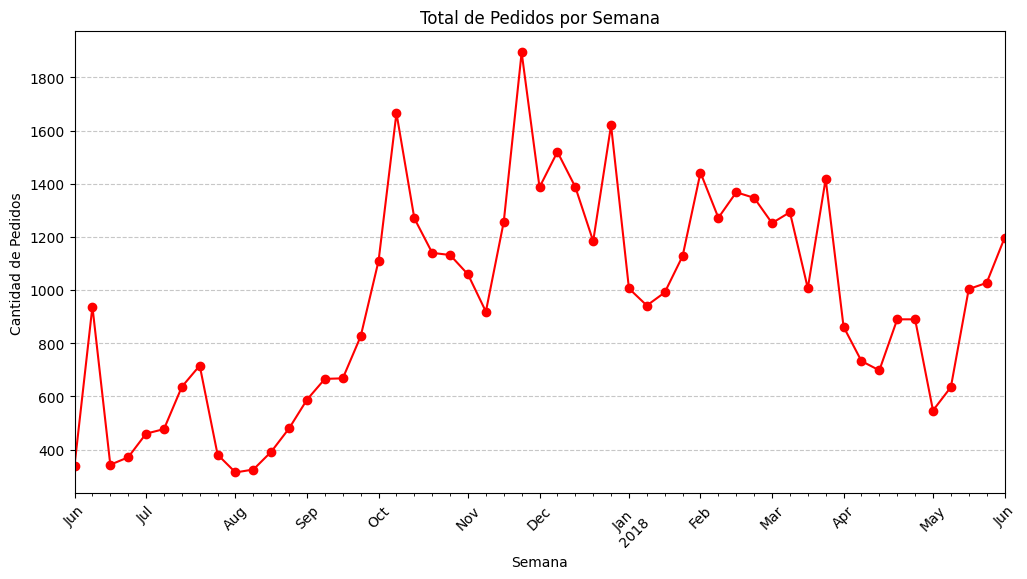

In [35]:
plt.figure(figsize=(12, 6))
weekly_orders.plot(kind="line", marker="o", color="red")

plt.title("Total de Pedidos por Semana")
plt.xlabel("Semana")
plt.ylabel("Cantidad de Pedidos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**ANÁLISIS**

**Aumento gradual desde junio hasta octubre**: Se observa una tendencia creciente en los pedidos, posiblemente impulsada por eventos de gran demanda o estrategias de marketing estacionales.  
**Picos notables en octubre y diciembre**: Estos meses podrían estar relacionados con festivales, conciertos populares o eventos de fin de año, donde la demanda de entradas es más alta.  
**Fluctuaciones y descenso progresivo hacia el final del período**: La actividad disminuye después de diciembre, lo que podría indicar una menor cantidad de eventos o una baja en la demanda post-temporada alta.  
**Rango de pedidos entre 0 y 1800 por semana**: Esto sugiere que hay semanas con alta actividad y otras con menor cantidad de ventas, dependiendo del calendario de eventos.  


### ¿Cuál es el tamaño promedio de compra?

**Calculo el promedio de gasto por pedido:**

In [36]:
avg_order_size = orders["revenue"].mean()
print(f"Tamaño promedio de compra: ${avg_order_size:.2f}")

Tamaño promedio de compra: $5.00


**Analizo el tamaño de compra por semana:**

In [37]:
orders["week"] = orders["buy_ts"].dt.to_period("W")
weekly_avg_order_size = orders.groupby("week")["revenue"].mean()

print(weekly_avg_order_size.head())  # Ver primeras semanas

week
2017-05-29/2017-06-04    3.162529
2017-06-05/2017-06-11    2.914264
2017-06-12/2017-06-18    5.890350
2017-06-19/2017-06-25    4.826388
2017-06-26/2017-07-02    5.233565
Freq: W-SUN, Name: revenue, dtype: float64


**Visualizo las tendencias en el ticket promedio:**

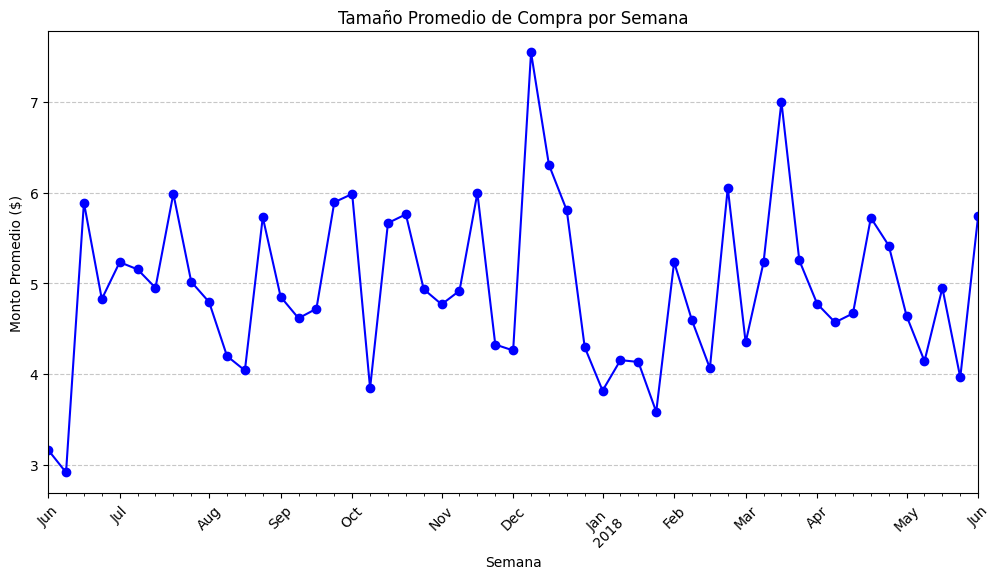

In [38]:
plt.figure(figsize=(12, 6))
weekly_avg_order_size.plot(kind="line", marker="o", color="blue")

plt.title("Tamaño Promedio de Compra por Semana")
plt.xlabel("Semana")
plt.ylabel("Monto Promedio ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**ANÁLISIS**


**Fluctuaciones en el ticket promedio**: Hay variaciones significativas en el gasto semanal, lo que sugiere que ciertos eventos o promociones pueden haber influenciado los montos de compra.  
**Picos en ciertos períodos**: Algunas semanas presentan aumentos notables en el ticket promedio, posiblemente debido a la venta de entradas para eventos de alta demanda o promociones específicas.  
**Tendencia general con estabilidad relativa**: Aunque hay fluctuaciones, el ticket promedio se mantiene dentro de un rango consistente, indicando una expectativa clara de gasto por parte de los clientes.  


### ¿Cuánto dinero traen? (LTV)

**Calculo el ingreso total por usuario:**

In [39]:
ltv = orders.groupby("uid")["revenue"].sum()

# Ver distribución de valores
print(ltv.describe())  # Estadísticas generales
print(ltv.head())  # Ver ejemplos individuales

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: revenue, dtype: float64
uid
313578113262317      0.55
1575281904278712     3.05
2429014661409475    73.33
2464366381792757     2.44
2551852515556206    10.99
Name: revenue, dtype: float64


**Calculo el LTV promedio:**

In [40]:
avg_ltv = ltv.mean()
print(f"LTV promedio por usuario: ${avg_ltv:.2f}")

LTV promedio por usuario: $6.90


**Visualizo cómo evoluciona el LTV por periodos semanales:**

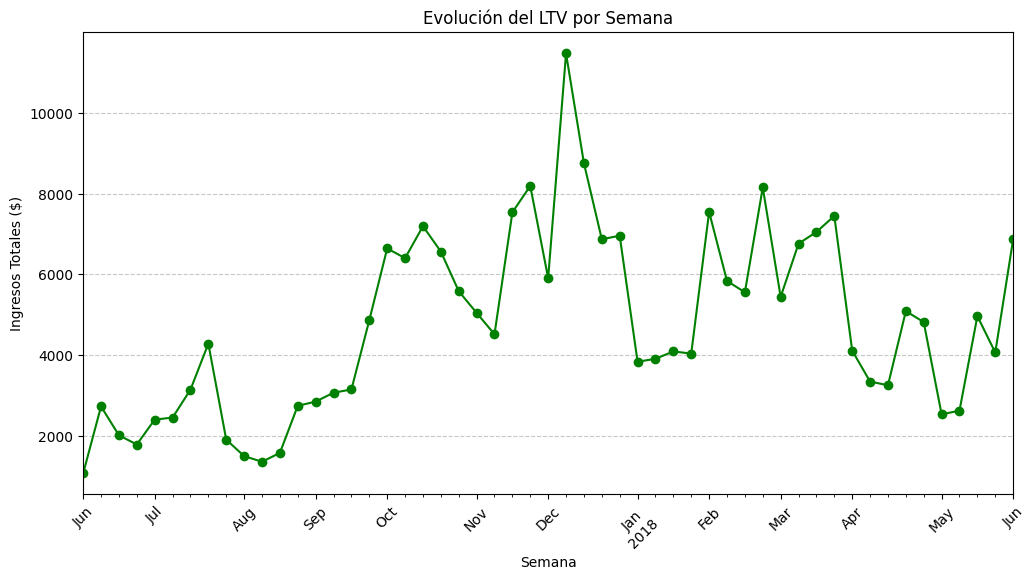

In [41]:
orders["week"] = orders["buy_ts"].dt.to_period("W")
weekly_ltv = orders.groupby("week")["revenue"].sum()

plt.figure(figsize=(12, 6))
weekly_ltv.plot(kind="line", marker="o", color="green")

plt.title("Evolución del LTV por Semana")
plt.xlabel("Semana")
plt.ylabel("Ingresos Totales ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

**ANÁLISIS**


**Tendencia fluctuante del LTV**: Los ingresos semanales varían significativamente, lo que sugiere que la demanda de entradas de eventos no es uniforme y depende de factores como la popularidad del evento, promociones y temporadas.  
**Picos de ingresos en ciertos períodos**: Se observan semanas con incrementos notables, probablemente relacionadas con la venta de entradas para festivales o conciertos de gran impacto.  
**Caídas en algunas semanas**: La baja en ingresos en ciertos períodos podría estar relacionada con falta de eventos destacados o períodos de menor actividad en la industria del entretenimiento.  


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Éxito</b> - ¡Fantástica sección de análisis de ventas! Has cubierto múltiples aspectos clave con precisión y profundidad. Aquí algunos puntos destacados en formato bullet:

*  **Definición clara de KPIs**: Calculaste correctamente los días hasta conversión y los etiquetaste para segmentar usuarios.
*  **Análisis de cohortes por conversión**: Muy buena estructuración de cohortes por primera visita, y el uso de `pivot tables` para construir matrices detalladas.
*  **Conversión semanal y visualización con heatmap**: Excelente implementación para observar el comportamiento de conversión con el tiempo.
*  **Exploración completa del comportamiento de compras**:

  * Pedidos por semana: bien visualizados y analizados.
  * Tamaño promedio de compra: adecuado y acompañado de gráfica.
  * LTV por usuario y por semana: implementado de forma profesional.

Esta sección demuestra una comprensión profunda del ciclo de vida del cliente y cómo extraer valor de los datos transaccionales. ¡Sigue así, estás aplicando muy bien conceptos de analítica de producto y marketing digital! 🚀📈

</div> 



## ANÁLISIS Y MÉTRICAS PARA MARKETING

### ¿Cuánto dinero se gastó?  

**Total/por fuente de adquisición a lo largo del tiempo**

In [42]:
#Reviso la información del dataframe 'costs'

print(costs.info())
print(costs.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None
   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


**Calculo el gasto total de marketing:**

In [43]:
total_marketing_cost = costs["costs"].sum()
print(f"Gasto total en marketing: ${total_marketing_cost:.2f}")

Gasto total en marketing: $329131.62


**Calculo el gasto por fuente de adquisición:**

In [44]:
cost_by_source = costs.groupby("source_id")["costs"].sum()
print(cost_by_source.sort_values(ascending=False))  # Ordenado de mayor a menor

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


**Visualizo la evolución del gasto por mes y por fuente:**

<Figure size 1600x600 with 0 Axes>

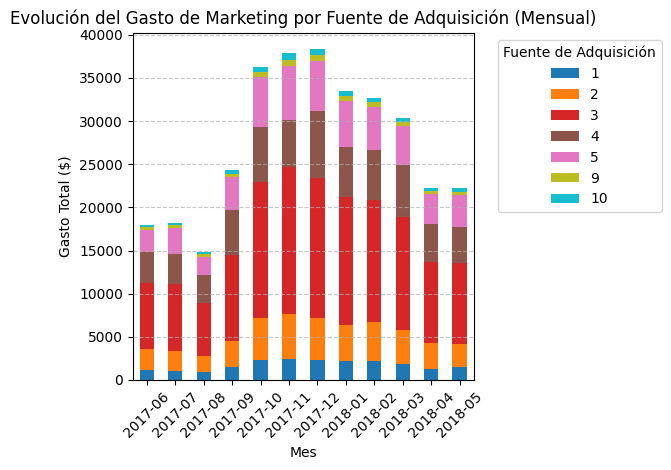

In [45]:
import matplotlib.pyplot as plt

# Agrupar el gasto por mes
costs["month"] = costs["dt"].dt.to_period("M")
monthly_costs_by_source = costs.groupby(["month", "source_id"])["costs"].sum().unstack()

# Crear el gráfico de barras apiladas por mes con mayor ancho
plt.figure(figsize=(16, 6))  # Ajustar tamaño para mayor amplitud
monthly_costs_by_source.plot(kind="bar", stacked=True, colormap="tab10")

# Configuración del gráfico
plt.title("Evolución del Gasto de Marketing por Fuente de Adquisición (Mensual)")
plt.xlabel("Mes")
plt.ylabel("Gasto Total ($)")
plt.xticks(rotation=45)
plt.legend(title="Fuente de Adquisición", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**ANÁLISIS**

**Picos de inversión en noviembre y diciembre de 2017**: Estos meses presentan los mayores gastos, posiblemente debido a campañas intensivas para la temporada de eventos de fin de año.  
**Disminución progresiva del gasto después de diciembre**: Desde enero 2018 en adelante, la inversión baja gradualmente, lo que podría reflejar un ajuste presupuestario o una menor cantidad de eventos relevantes en esos meses.  
**Variabilidad en la distribución entre fuentes**: Algunas fuentes de adquisición (como la 3) dominan el gasto en ciertos meses, lo que indica un enfoque variable en estrategia publicitaria.  
**Diversificación en fuentes de adquisición**: Se utilizan múltiples canales (hasta siete diferentes), lo que sugiere una estrategia multicanal para atraer clientes.  




### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

**Calculo el gasto total de marketing:**

In [46]:
total_marketing_cost = costs["costs"].sum()
print(f"Gasto total en marketing: ${total_marketing_cost:.2f}")

Gasto total en marketing: $329131.62


**Calculo el gasto por fuente:**

In [47]:
cost_by_source = costs.groupby("source_id")["costs"].sum()
print("Gasto por fuente de adquisición:")
print(cost_by_source.sort_values(ascending=False))

Gasto por fuente de adquisición:
source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


**Creo un dataFrame que asocie la fuente de adquisición (source_id) con los clientes que realizaron su primera compra (first_purchase), lo que me permitirá calcular el Costo de Adquisición de Clientes (CAC) por fuente con mayor precisión:**


In [48]:
# Extraigo el mes de primera compra en 'conversion'
conversion["month"] = conversion["first_purchase"].dt.to_period("M")

# Extraigo el mes de los costos
costs["month"] = costs["dt"].dt.to_period("M")

# Uno los datasets
conversion = conversion.merge(costs[["source_id", "month", "costs"]], on="month", how="left")

# Reviso la estructura
print(conversion.head())

          first_visit      first_purchase  days_to_conversion  \
0 2017-09-18 22:49:00 2018-01-03 21:51:00                 106   
1 2017-09-18 22:49:00 2018-01-03 21:51:00                 106   
2 2017-09-18 22:49:00 2018-01-03 21:51:00                 106   
3 2017-09-18 22:49:00 2018-01-03 21:51:00                 106   
4 2017-09-18 22:49:00 2018-01-03 21:51:00                 106   

  conversion_label cohort_month    month  source_id  costs  
0  Conversion 106d      2017-09  2018-01        1.0  82.86  
1  Conversion 106d      2017-09  2018-01        1.0  70.96  
2  Conversion 106d      2017-09  2018-01        1.0  88.77  
3  Conversion 106d      2017-09  2018-01        1.0  83.95  
4  Conversion 106d      2017-09  2018-01        1.0  77.45  


**Calculo el CAC por fuente diviendo el gasto total de cada fuente entre el número de clientes adquiridos por esa fuente:**

In [49]:
# Calculo número de clientes por fuente
customers_by_source = conversion.groupby("source_id")["first_purchase"].nunique()

# Calculo el costo total por fuente
cost_by_source = conversion.groupby("source_id")["costs"].sum()

# Calculo CAC
cac_by_source = (cost_by_source / customers_by_source).round(2)
print("Costo de Adquisición de Clientes por Fuente:")
print(cac_by_source.sort_values(ascending=False))  # Ordenado de mayor a menor

Costo de Adquisición de Clientes por Fuente:
source_id
3.0     13797.83
4.0      5845.26
5.0      5044.98
2.0      4180.27
1.0      2031.85
10.0      567.40
9.0       538.60
dtype: float64


**Visualizo con un gráfico de barras:**

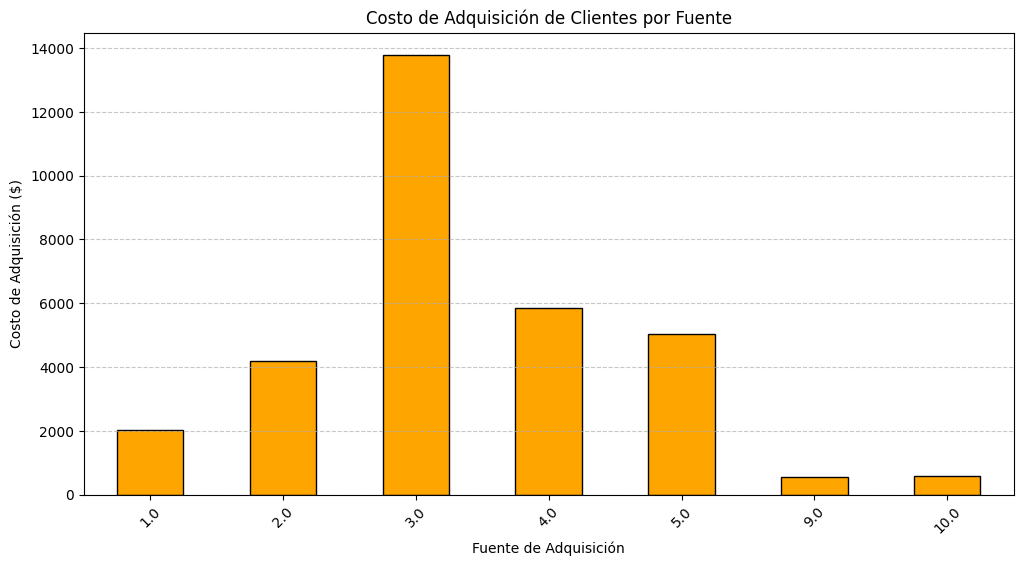

In [50]:
plt.figure(figsize=(12, 6))
cac_by_source.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Costo de Adquisición de Clientes por Fuente")
plt.xlabel("Fuente de Adquisición")
plt.ylabel("Costo de Adquisición ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**ANÁLISIS**

**Fuente 3.0 tiene el CAC más alto**: Aproximadamente **14,000 dólares**, lo que sugiere que adquirir clientes a través de este canal es mucho más costoso que los demás.  
**Fuentes 9.0 y 10.0 tienen el CAC más bajo**: Estas fuentes presentan los menores costos de adquisición, lo que podría indicar una mayor eficiencia en la captación de clientes.  
**Variabilidad en el CAC entre fuentes**: Las diferencias en costos sugieren que algunos canales requieren más inversión para captar clientes, mientras que otros logran conversiones con menos presupuesto.  


### ¿Cuán rentables eran las inversiones? (ROMI)

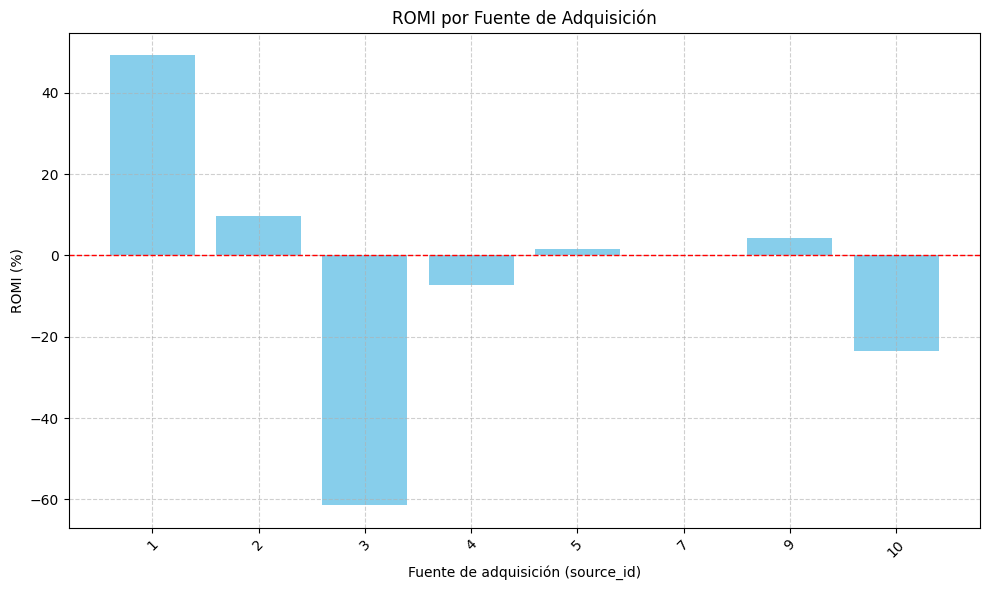

In [51]:
# Obtengo la fuente de adquisición de cada usuario (primera visita)
first_visits = visits.sort_values('start_ts').drop_duplicates('uid')
user_sources = first_visits[['uid', 'source_id']]

# Asigno fuente a cada orden
orders_with_source = orders.merge(user_sources, on='uid', how='left')

# Calculo ingresos por fuente
revenue_by_source = orders_with_source.groupby('source_id', as_index=False)['revenue'].sum()

# Calculo costos por fuente
costs_by_source = costs.groupby('source_id', as_index=False)['costs'].sum()

# Uno ingresos y costos por fuente
romi_df = revenue_by_source.merge(costs_by_source, on='source_id', how='outer').fillna(0)

# Calculo ROMI
romi_df['ROMI (%)'] = ((romi_df['revenue'] - romi_df['costs']) / romi_df['costs']) * 100

# Limpio y preparo datos para graficar (evitar errores y warnings)
romi_plot_df = romi_df.dropna(subset=['ROMI (%)']).copy()
romi_plot_df.loc[:, 'ROMI (%)'] = romi_plot_df['ROMI (%)'].astype(float)

# Visualizo ROMI por fuente
plt.figure(figsize=(10, 6))
plt.bar(romi_plot_df['source_id'].astype(str), romi_plot_df['ROMI (%)'], color='skyblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('ROMI por Fuente de Adquisición')
plt.xlabel('Fuente de adquisición (source_id)')
plt.ylabel('ROMI (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**ANÁLISIS**

**Fuente 1 tiene el mayor retorno (49.23%)**: Este canal generó ingresos significativamente superiores a los costos de adquisición.  
**Fuente 2 también es positiva (9.61%)**, aunque con una rentabilidad menor.  
**Fuentes 9 y 5 tienen un ROMI bajo pero positivo**: Indica que estas fuentes recuperan la inversión pero con márgenes reducidos.  
**Fuentes 4, 10 y 3 tienen ROMI negativo**: La inversión en estas fuentes no generó suficientes ingresos para cubrir los costos publicitarios.  
**Fuente 7 tiene costos de adquisición registrados como `0.00`**, lo que puede requerir validación, si no hubo inversión en esa fuente, los ingresos pueden provenir de tráfico orgánico o referencias externas.  



**Analizo la relación entre costos e ingresos por fuente**

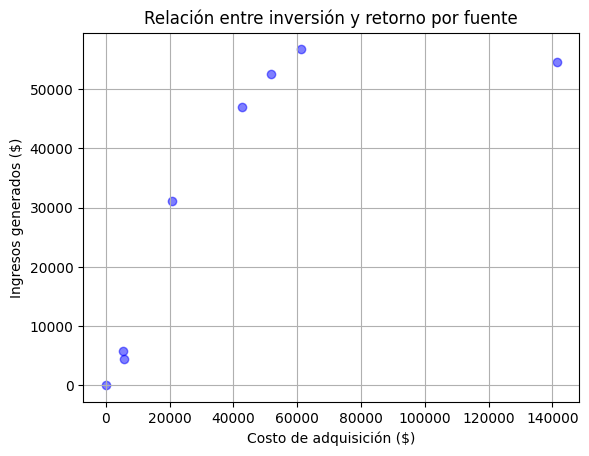

In [52]:
plt.scatter(romi_df["costs"], romi_df["revenue"], c="blue", alpha=0.5)
plt.xlabel("Costo de adquisición ($)")
plt.ylabel("Ingresos generados ($)")
plt.title("Relación entre inversión y retorno por fuente")
plt.grid(True)
plt.show()

**ANÁLISIS**


**Tendencia positiva en la mayoría de las fuentes**: A medida que aumenta la inversión, también lo hace el retorno en ingresos, lo que sugiere una correlación positiva entre gasto y rentabilidad.  
**Puntos dispersos**: Algunas fuentes generan ingresos significativamente superiores al costo de adquisición, mientras que otras tienen costos altos pero ingresos bajos, lo que podría indicar ineficiencia.  
**Fuentes con inversión baja pero buenos retornos**: Identificar estas fuentes puede ayudar a optimizar la estrategia de adquisición, maximizando eficiencia sin aumentar costos.  **Fuentes con alto gasto y bajo retorno**: Si hay puntos en la parte baja derecha del gráfico, estas fuentes pueden necesitar ajustes en segmentación o creatividad publicitaria.  


**Analizo el número usuarios únicos mensuales por dispositivo:**

<Figure size 1400x700 with 0 Axes>

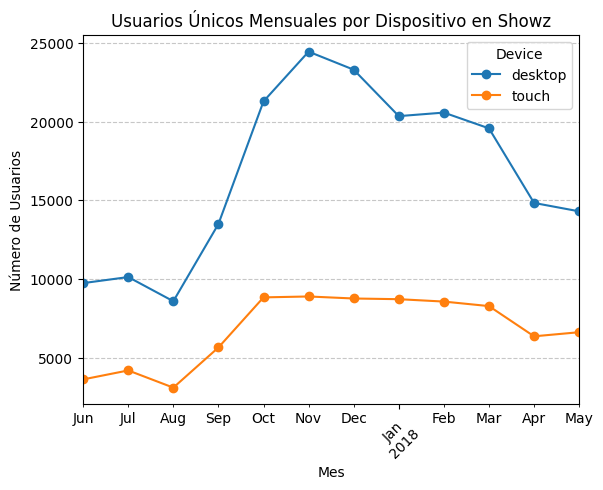

In [53]:
# Convierto start_ts a período mensual
visits["month"] = visits["start_ts"].dt.to_period("M")

# Cuento los usuarios únicos por dispositivo y mes
users_by_device_monthly = visits.groupby(["month", "device"])["uid"].nunique().unstack()

# Visualizo el comportamiento de usuarios por dispositivo
plt.figure(figsize=(14, 7))
users_by_device_monthly.plot(kind="line", marker="o")

plt.title("Usuarios Únicos Mensuales por Dispositivo en Showz")
plt.xlabel("Mes")
plt.ylabel("Número de Usuarios")
plt.xticks(rotation=45)
plt.legend(title="Device")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**ANÁLISIS**

**Desktop tiene el mayor volumen de usuarios**: Supera los **25,000 usuarios en noviembre**, mostrando un pico significativo antes de una disminución gradual hasta mayo. El número de usuarios que acceden desde un dispositivo de escritorio es significativamente mayor que el de los que usan dispositivos táctiles (móviles). La base de usuarios de escritorio es aproximadamente 2.5 a 3 veces más grande que la móvil.

**Touch presenta un crecimiento estable**: Aumenta desde junio hasta septiembre y se estabiliza en torno a los **7,000 usuarios**, lo que sugiere una audiencia constante. 

**Patrón de tráfico estacional**: **El pico en noviembre** puede estar relacionado con campañas de eventos, promociones o una temporada alta de adquisición.  

**Tendencias Paralelas:** Ambas curvas (desktop y touch) siguen el mismo patrón general: **crecimiento constante** desde junio hasta alcanzar un pico en noviembre de 2017, y  una**caída notable** a partir de diciembre de 2017 que continúa durante la primera mitad de 2018. Esto indica que los factores que impulsaron el crecimiento y la posterior caída (como campañas de marketing, estacionalidad, etc.) afectaron a ambos segmentos de usuarios de manera similar.

**Brecha Constante:** La brecha entre usuarios de escritorio y móviles se mantiene relativamente proporcional a lo largo del tiempo. No parece haber un punto en el que el uso móvil comience a alcanzar al de escritorio.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Éxito</b> - Buena implementación del análisis de marketing. La extracción de gastos por fuente, el cálculo de CAC, ROMI y la visualización de usuarios por dispositivo están correctamente estructurados. Lograste articular bien la relación entre inversión y retorno, y el análisis de eficiencia por canal está bien fundamentado. Para fortalecer este análisis, podrías incorporar evaluaciones comparativas a lo largo del tiempo y revisar la atribución de fuentes en primera visita versus compra.

</div>

## CONCLUSIÓN GENERAL

El análisis de datos de "Showz" revela un modelo de negocio transaccional y altamente dependiente de eventos y campañas de marketing puntuales. El comportamiento del usuario se caracteriza por:

**Baja Retención:** Los clientes no muestran una alta lealtad. Vienen, compran una entrada para un evento específico y la mayoría no regresa de forma recurrente. El pico de actividad de finales de 2017 fue un evento aislado, impulsado por una fuerte inversión, y no una base de crecimiento orgánico sostenido.

**Conversión Rápida:** La ventana de oportunidad es muy corta. La mayoría de los usuarios que compran lo hacen en su primera visita o a los pocos días. Si no se les convence rápidamente, se pierden.

**Dominio del Escritorio:** La plataforma de escritorio es, por un margen de 3 a 1, el principal punto de contacto con los usuarios, aunque las tendencias de tráfico son idénticas en ambos dispositivos (escritorio y móvil).

El análisis del comportamiento de usuarios, fuentes de tráfico, conversiones y rentabilidad revela un patrón claro: **el crecimiento más fuerte se concentró entre junio y noviembre de 2017**, con picos de sesiones, usuarios únicos y pedidos. A partir de diciembre 2017, se observa una **caída sostenida en visitas, pedidos y retorno**, probablemente por una combinación de factores como estacionalidad, menor inversión en marketing, y/o saturación del mercado inicial.


**¿Cuánto invertir y dónde?**

**1. Recomendación de inversión total:**
Basándonos en los mejores períodos de retorno (noviembre-diciembre 2017), se recomienda una inversión mensual **en torno a los niveles de esos meses pico** si el calendario de eventos lo justifica.

**Rango sugerido mensual:**
Entre **15,000 y 20,000 USD**, priorizando meses con eventos importantes (revisar el calendario estacional).


**¿Dónde invertir?**

Para un negocio con estas características, las métricas de volumen como "usuarios únicos" o "sesiones" son útiles para entender tendencias, pero poco confiables para tomar decisiones de inversión. Pueden llevar a gastar dinero para atraer tráfico que no convierte. Por lo tanto, la métrica fundamental para guiar la estrategia debe ser el ROMI (Retorno de la Inversión en Marketing). Esta métrica nos dice directamente si estamos ganando o perdiendo dinero con nuestras campañas. Se complementa con el CAC (Costo de Adquisición de Cliente), que nos informa sobre la eficiencia de cada canal.

Al analizar estas métricas, las conclusiones fueron claras:

La rentabilidad es extremadamente desigual: Algunas fuentes son rentables, mientras que otras son auténticos sumideros de dinero. El costo de adquisición varía drásticamente. Hay canales muy eficientes y otros extremadamente caros. La Fuente 3, en particular, presenta un CAC altísimo y un ROMI negativo, siendo un foco rojo principal.



**Fuentes recomendadas:**

**Fuente 1**: Tiene el **mejor ROMI (49.23%)**. Aunque su CAC no es el más bajo, **genera ingresos altos en relación con el gasto**. Ideal para escalar inversión.
**Fuente 2**: ROMI positivo (9.61%). Aunque menor que Fuente 1, **mantiene rentabilidad constante**, recomendable como apoyo.                                 
**Fuente 9** : Bajo CAC + ROMI positivo: **buena eficiencia en captación**. Puede usarse para experimentar y escalar con bajo riesgo.                               
**Fuente 5** | ROMI positivo y CAC moderado: puede complementar las fuentes principales. Recomendada para diversificación controlada.                               

**Fuentes a evitar o revisar:**

**Fuente 3**: **CAC extremadamente alto (\~14,000 USD)** y ROMI negativo. **No rentable** con la estrategia actual. Requiere revisión de segmentación o eliminación. 
**Fuente 4 y 10**: ROMI negativo. Poca eficiencia en retorno de inversión. Pueden estar generando tráfico irrelevante o mal dirigido.                                   
**Fuente 7**: Tiene costos de adquisición en **0.00** — revisar si es tráfico orgánico o error de registro. Podría ser **una oportunidad gratuita o mal medida**. 



**Otras recomendaciones estratégicas:**

**Reforzar inversión justo después del registro**: La mayoría de conversiones ocurren en la **primera semana**, por lo que es clave tener campañas de remarketing o emails activos en ese período.

**Analizar eventos con mejor conversión**: Aumentar campañas en torno a eventos de alta demanda (octubre y diciembre son meses clave).

**Optimizar para desktop sin descuidar móvil**: Aunque la mayoría del tráfico es desde desktop, el tráfico móvil es constante y puede crecer si se mejora la experiencia de usuario.

**Retargeting para usuarios con sesiones largas sin conversión**: Aquellos que estuvieron más tiempo pero no compraron podrían estar en fase de decisión avanzada.

---

**Resumen ejecutivo**

Se recomienda **priorizar inversión en fuentes 1, 2, 9 y 5**, con un presupuesto mensual flexible según calendario de eventos. Evitar fuentes con ROMI negativo salvo revisión de estrategia. Enfocar esfuerzos en cerrar ventas durante la primera semana tras la visita o registro, y monitorear dispositivos, horarios y días de mejor conversión.


# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Tu proyecto está **aprobado**. Has cubierto de manera integral todas las etapas del análisis de producto y marketing, desde la exploración de datos hasta la evaluación del retorno de inversión. Mostraste una correcta implementación de técnicas analíticas relevantes y estructuraste tus conclusiones con claridad.

### Puntos Positivos:

* **Manejo de cohortes y métricas clave**: Aplicaste correctamente análisis de cohortes, cálculo de conversión por días y semanas, y tasas de retención.
* **Análisis de comportamiento de usuario**: Segmentaste y limpiaste adecuadamente los datos de sesiones, compras y usuarios únicos por dispositivo.
* **Evaluación de performance de marketing**: Lograste conectar costos, CAC y ROMI por fuente de adquisición con claridad, integrando ingresos, gastos y retornos.
* **Visualizaciones claras y funcionales**: Usaste gráficos efectivos para respaldar el análisis sin sobrecargar la narrativa.

### Sugerencias para Seguir Desarrollándote:

* **Mejorar la precisión de modelos predictivos**: En futuras tareas de machine learning, evalúa técnicas adicionales como selección de variables, ingeniería de características y ajuste de hiperparámetros.
* **Automatización y reutilización**: Considera estructurar funciones reutilizables para tareas repetitivas como cohortes, limpieza y cálculos de KPIs.
* **Refuerza tu presencia profesional**:

  * Abre un perfil en GitHub para documentar tus notebooks y proyectos.
  * Comparte tus hallazgos y visualizaciones en LinkedIn.
  * Documenta tus análisis como si fueran entregables profesionales, con storytelling orientado al negocio.

Este trabajo refleja una sólida base en análisis de datos y un razonamiento bien estructurado. Te animo a seguir practicando y publicando tus avances. ¡Felicidades por este paso importante!

</div>
